#### 月球登陆

##### 环境创建

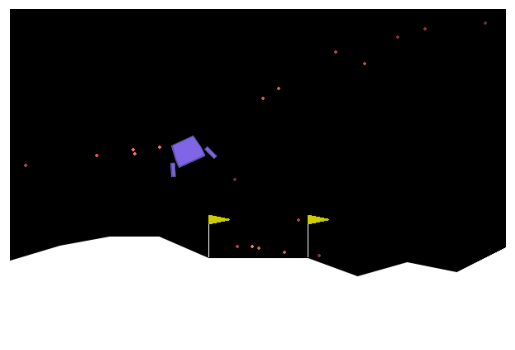

In [4]:
import gym
from matplotlib import pyplot as plt
from IPython import display
import numpy as np

# 创建一个包装器来处理类型问题
class BoolCompatibilityWrapper(gym.Wrapper):
    def step(self, action):
        obs, reward, terminated, truncated, info = self.env.step(action)
        # 确保terminated和truncated是bool类型
        terminated = bool(terminated)
        truncated = bool(truncated)
        return obs, reward, terminated, truncated, info

# 创建环境并应用包装器
env = gym.make('LunarLander-v2', render_mode='rgb_array')
env = BoolCompatibilityWrapper(env)  # 应用包装器

# 初始化游戏
state, info = env.reset()

for i in range(300):
    action = env.action_space.sample()
    state, reward, terminated, truncated, info = env.step(action)
    over = terminated or truncated

    if i % 5 == 0:
        display.clear_output(wait=True)
        plt.imshow(env.render())
        plt.axis('off')
        plt.show()

    if over:
        state, info = env.reset()

env.close()

In [8]:

env.action_space
env.observation_space.high, env.observation_space.low
env.reward_range

(-inf, inf)

#### 手动测试环境

In [ ]:
import gym
import pygame
from gym.utils.play import play

#定义按键映射
mapping = {(pygame.K_LEFT, ): 0, (pygame.K_RIGHT, ): 1}

#直接玩游戏游戏,这要求有图形界面
play(gym.make('CartPole-v0'), keys_to_action=mapping)